# Assignment 3 DAT341: Stance classification
## https://www.cse.chalmers.se/~richajo/dit866/assignments/a3/assignment3.html
### Group 1: Mirco Ghadri, Tobias Filmberg, Sameer Jathavedan

## Introduction

The purpose of this assignment is to develop a supervised machine learning algorithm that can determine whether a given text message represents a positive or negative opinion about Covid-19 vaccination. To achieve this, the model will be trained with labeled data that contains messages with positive opinion about Covid-19 vaccination and messages with negative opinion about Covid-19 vaccination. The goal is to create a machine learning model with as high accuracy as possible in predicting whether a message is pro covid 19-vaccination or anti covid-19 vaccination.

## 1. Data Preprocessing

We started with a simpler dataset, **a3_train_round1.tsv**, before using the actual final dataset **a3_train_final.tsv** to train the model. This is because it is faster and easier to work with the simpler dataset. Anything that works on the simpler dataset can then be done to the final dataset.

In [1]:
import pandas as pd

In [2]:
training_data = pd.read_csv("a3_train_round1.tsv", sep="\t", header=None, names = ["Prediction","Message"])
training_data

,Prediction,Message
0,1,"3 shots, sinopharm. People all around me teste..."
1,1,The only way forward for us in this pandemic i...
2,1,Covaxin out of all the above vaccine is the on...
3,1,I don't think those dead antivax people can ta...
4,0,There is no way I get this vaccine in my body.
...,...,...
12679,1,"I've got 4 Covid vaccines on board,i'll take t..."
12680,0,I'm so over hearing about the 'miracle' Covid ...
12681,1,Yes!! And yes!
12682,1,From Bangladesh not living in Canada I agree I...


### To train an algorithm on the dataset, we need to separate the features from the class labels

In [3]:
training_labels = training_data["Prediction"]
training_labels

0        1
1        1
2        1
3        1
4        0
        ..
12679    1
12680    0
12681    1
12682    1
12683    1
Name: Prediction, Length: 12684, dtype: int64

### How do you represent your data as features?

There are 2 ways to represent the data as features to the machine learning model we will use. We can either use a CountVectorizer or a TfidfVectorizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tv = TfidfVectorizer()
word_counts = cv.fit_transform(training_data["Message"])
word_weights = tv.fit_transform(training_data["Message"])

### The difference  between CountVectorizer and TfidfVectorizer is that CountVectorizer stores a matrix of word counts while TfidfVectorizer stores a matrix of word weights. Tfidf will give smaller weights to word that occur in many documents. This can help the algorithm perform better because uninformative words like "is" and "are" will be ignored when making a prediction of whether a message is pro- or anti-vaccine.

In [5]:
print(word_weights.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(word_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### The shape tells us the number of rows and the number of columns. Each row represents a message. Each column represents the frequency count of a particular word in a particular message. 

In [7]:
word_counts.shape

(12684, 13488)

### The feature names show the different words that were counted by the count vectorizer. The length of cv.get_feature_names() matches the number of columns in word_counts.shape

In [8]:
cv.get_feature_names()

['00',
 '000',
 '00005',
 '0013',
 '00162',
 '0018',
 '006',
 '00out',
 '00unvaccinated',
 '01',
 '0152',
 '02',
 '03',
 '035613',
 '05',
 '059970',
 '06',
 '07',
 '075',
 '0bqaeyp52j',
 '0ojkowf25z',
 '0yln6067s9',
 '10',
 '100',
 '1000',
 '1000s',
 '100k',
 '100ks',
 '100s',
 '100th',
 '100x',
 '101',
 '102',
 '104',
 '105',
 '107',
 '108',
 '109',
 '10days',
 '10k',
 '10lb',
 '10million',
 '10s',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '112',
 '115lbs',
 '1161',
 '11k',
 '11oz',
 '11th',
 '12',
 '120',
 '1200',
 '120bpm',
 '121',
 '122',
 '125',
 '1291',
 '12hrs',
 '12months',
 '12th',
 '13',
 '130',
 '135',
 '136',
 '137',
 '13b',
 '13mm',
 '14',
 '140',
 '146',
 '14th',
 '15',
 '150',
 '1500s',
 '153',
 '156',
 '15min',
 '15th',
 '15vdays',
 '15yrs',
 '16',
 '160b',
 '1635',
 '16th',
 '17',
 '17000',
 '175',
 '177',
 '1796',
 '17th',
 '17x',
 '17yr',
 '18',
 '1800s',
 '185',
 '18th',
 '19',
 '1900',
 '1900s',
 '1918',
 '192',
 '195',
 '1950',
 '1950s',
 '1953',
 '1959',
 '1964',

## 2. Training the model

### How did you select which learning algorithms to use?

One of the best learning algorithms for text classification is Multinomial Naive Bayes classifier. It can be used to detect whether a text is a spam/ham, a review is negative or positive but also whether a message is pro-vaccination or anti-vaccination. Naive Bayes Classifier is designed to work well with CountVectorizer since it uses the word counts to calculate probabilities of words appearing given if the message is pro-vaccination or anti-vaccination. There are 2 ways to train the Multinomial Naive Bayes classifier. You can either give it a CountVectorizer matrix, or a TfidfVectorizer matrix. 

In [9]:
from sklearn.naive_bayes import MultinomialNB

mnb_cv = MultinomialNB()
mnb_tv = MultinomialNB()
#Training the MNB classifier with a count vectorizer matrix that stores word frequency counts
mnb_cv.fit(word_counts, training_labels)
#Training the MNB classifier with a tfidf vectorizer matrix that stores word weights
mnb_tv.fit(word_weights, training_labels)

MultinomialNB()

In [10]:
test_set = pd.read_csv("a3_test.tsv", sep="\t", header=None, names = ["Prediction", "Message"])
test_set

,Prediction,Message
0,1,I did my own research means you looked online ...
1,1,I don't know what's in it. As if they know wha...
2,1,"In the September time frame, unvaccinated peop..."
3,0,It is a pity that people are dying from the va...
4,0,No long-term safety data? No problem! - Every ...
...,...,...
1519,0,“Covid-19 is created by demon” Earth is turnon...
1520,0,“Medical professionals” that don’t even eat he...
1521,1,“No vaccine has ever been proven effective.” T...
1522,0,“We cannot have normality until everyone globa...


### You can not call cv.fit_transform here, otherwise there will be a dimension mismatch. Instead, you need to call cv.transform since the training data used to train the model fixes the vocabulary. You can not give it new vocabulary from the test set that is has not been trained on to make a prediction.

In [11]:
word_counts_test = cv.transform(test_set["Message"])
word_weights_test = tv.transform(test_set["Message"])

In [12]:
word_counts_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
word_weights_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### The Multinomial Naive Bayes classifier has a classification accuracy of 80%. This means that it correctly predicts whether a message is pro- or anti-vaccine 80% of the time. However, this can be improved.

In [14]:
mnb_cv.score(word_counts_test, test_set["Prediction"])

0.8070866141732284

### When training the MNB classifier on word weights using TfidfVectorizer, it performs better than when it was trained on word occurence frequencies. This gives TfidfVectorizer an advantage over CountVectorizer.

In [15]:
mnb_tv.score(word_weights_test, test_set["Prediction"])

0.8195538057742782

### Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using.)

The feature_log_prob_ parameter of the MNB model gives us the probabilities for each word to occur given the class. The first nested list shows the probabilities of each word occuring given the class is 0(anti-vaccine). The second nested list shows the probabilities of the word occuring given it is in class 1(pro-vaccine). The Naive Bayes Model uses these probabilities to calculate whether a message is pro or anti vaccine. However, just because a word has a high probability of occuring in the anti-vaccine messages, does not mean the model considers it important. The same word could appear in the pro-vaccine messages. But if a word has a high probability of occuring in a certain class and a low probability of occuring in another class, then it can be used to indicate that a message is anti-/pro vaccine and thus the feature is considered important by the model.

In [16]:
mnb_cv.classes_

array([0, 1], dtype=int64)

### The feature_log_prob_ contains 2 lists. The first list shows the log probabilities of finding specific words in anti covid-19 vaccination messages(class 0). The second list shows the log probabilities of finding specific words in pro covid-19 vaccination messages(class 1).

In [17]:
mnb_cv.feature_log_prob_

array([[-11.37065889,  -8.73160156, -12.06380607, ..., -11.37065889,
        -12.06380607, -12.06380607],
       [-12.08502867,  -8.55866815, -11.39188149, ..., -12.08502867,
        -11.39188149, -11.39188149]])

### The log probabilities at each index corresponds to the words in cv.get_feature_names()

In [18]:
cv.get_feature_names()

['00',
 '000',
 '00005',
 '0013',
 '00162',
 '0018',
 '006',
 '00out',
 '00unvaccinated',
 '01',
 '0152',
 '02',
 '03',
 '035613',
 '05',
 '059970',
 '06',
 '07',
 '075',
 '0bqaeyp52j',
 '0ojkowf25z',
 '0yln6067s9',
 '10',
 '100',
 '1000',
 '1000s',
 '100k',
 '100ks',
 '100s',
 '100th',
 '100x',
 '101',
 '102',
 '104',
 '105',
 '107',
 '108',
 '109',
 '10days',
 '10k',
 '10lb',
 '10million',
 '10s',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '112',
 '115lbs',
 '1161',
 '11k',
 '11oz',
 '11th',
 '12',
 '120',
 '1200',
 '120bpm',
 '121',
 '122',
 '125',
 '1291',
 '12hrs',
 '12months',
 '12th',
 '13',
 '130',
 '135',
 '136',
 '137',
 '13b',
 '13mm',
 '14',
 '140',
 '146',
 '14th',
 '15',
 '150',
 '1500s',
 '153',
 '156',
 '15min',
 '15th',
 '15vdays',
 '15yrs',
 '16',
 '160b',
 '1635',
 '16th',
 '17',
 '17000',
 '175',
 '177',
 '1796',
 '17th',
 '17x',
 '17yr',
 '18',
 '1800s',
 '185',
 '18th',
 '19',
 '1900',
 '1900s',
 '1918',
 '192',
 '195',
 '1950',
 '1950s',
 '1953',
 '1959',
 '1964',

### We can see that words such as "the", "and", "to", "it", "of" have the highest log probability. However, this does not mean that those words are important to the MNB model in determining whether a message is anti-vaccine. This is because these words also occur a lot in the pro-vaccine messages since they are sentence builders. A way to find which features the model considers important in determining whether a message is anti/pro vaccination is to find words with high frequencies in one class and low frequencies in the other class.

In [19]:
print(sorted(list(zip(cv.get_feature_names(), mnb_cv.feature_log_prob_[0])), key = lambda x : x[1], reverse=True))

[('the', -3.129614533838293), ('and', -3.7226343220056055), ('to', -3.752653521174677), ('it', -4.0800250001989165), ('of', -4.163540032408666), ('vaccine', -4.317505406944928), ('is', -4.379942088919938), ('that', -4.42176166630311), ('in', -4.561619582573443), ('my', -4.576072307739923), ('for', -4.634878874374095), ('not', -4.64203027553172), ('you', -4.663796552013675), ('covid', -4.699259054920725), ('are', -4.7559332884126615), ('have', -4.830350650554928), ('this', -4.84709658246691), ('they', -4.902960162512068), ('people', -4.972063954081214), ('was', -5.112033904777456), ('be', -5.1294088592478095), ('all', -5.220056120170143), ('who', -5.237260845619773), ('with', -5.244882003900846), ('get', -5.268100294002854), ('so', -5.268100294002854), ('had', -5.274834326184197), ('vaccines', -5.297614354516017), ('from', -5.335177456091666), ('no', -5.344792914791108), ('we', -5.3593917142122605), ('vaccinated', -5.4762560543515715), ('on', -5.55057595826406), ('will', -5.565523919699

In [20]:
print(sorted(list(zip(cv.get_feature_names(), mnb_cv.feature_log_prob_[1])), key = lambda x : x[1], reverse=True))

[('the', -3.149783258766462), ('and', -3.594179457719701), ('to', -3.6053296868076785), ('of', -4.035601616685641), ('it', -4.182911127519888), ('vaccine', -4.273055244174313), ('is', -4.3761690727491604), ('that', -4.457484283307832), ('covid', -4.534893331307907), ('in', -4.535419508641803), ('my', -4.6023468456416845), ('you', -4.613665585609239), ('for', -4.623963159442052), ('get', -4.691765579032498), ('are', -4.718583525468737), ('have', -4.792010994023554), ('vaccinated', -4.809856354343564), ('vaccines', -4.946955639751988), ('people', -4.9621620151972525), ('this', -4.991624047927569), ('not', -5.014304566536059), ('be', -5.11429859565281), ('they', -5.147714592572654), ('so', -5.1923870326242465), ('with', -5.199519003761518), ('but', -5.2036173701538), ('we', -5.233843746302592), ('all', -5.2859728117375395), ('got', -5.292684246325527), ('was', -5.313093117956734), ('as', -5.324613982712908), ('from', -5.375724333538037), ('had', -5.432165644442988), ('can', -5.46762569582

### We will now try some other classifying machine learning algorithms to see what score we can get.

In [21]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(word_counts, training_labels)

Perceptron()

In [22]:
perceptron.score(word_counts_test, test_set["Prediction"])

0.7565616797900262

### How well does your system compare to a trivial baseline?

### We want to compare the classification accuracy from the MNB and Perceptron with that of a dummy classifier. The dummy classifier always predicts the most common class that it got trained on. So if the most common class in the training set was 1 for example, the dummy classifier will always predict the class of any unknown data as 1, without caring about its features.

In [23]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(training_data["Message"], training_labels)

DummyClassifier()

In [24]:
training_labels.value_counts()

0    6544
1    6140
Name: Prediction, dtype: int64

### The reason the dummy classifier gets an accuracy score of 0.5 on the test set is because it always predicts the message label as 0 and half of the messages in the test set are 0 and half of the messages are 1. Hence, the dummy classifier is correct 50% of the time.

In [25]:
dc.score(test_set["Message"], test_set["Prediction"])

0.5

In [26]:
test_set["Prediction"].value_counts()

0    762
1    762
Name: Prediction, dtype: int64

### Any accuracy score below the accuracy score of the dummy classifier is considered very poor.

### Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix. It is also probably meaningful to include selected errors and comment on what might have gone wrong.

[]

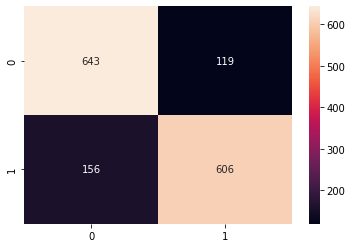

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(test_set["Prediction"],mnb_tv.predict(word_weights_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.plot()

### We can see that the there are 156 false negatives(predicting a message as anti-vaccine when it is pro vaccine) and 119 false positives(predicting a message as pro-vaccine when it in fact is anti-vaccine). It would also make more sense to see which sentences it classified as false positives and which sentences it classified as false negatives.

In [28]:
predictions = mnb_tv.predict(word_weights_test)
true_vs_predicted = list(zip(test_set["Prediction"],predictions))
error_predictions = [(i, (x, y)) for i, (x, y) in enumerate(true_vs_predicted) if x != y]
error_predictions

[(1, (1, 0)),
 (6, (0, 1)),
 (21, (0, 1)),
 (23, (1, 0)),
 (28, (0, 1)),
 (31, (1, 0)),
 (32, (1, 0)),
 (35, (1, 0)),
 (46, (0, 1)),
 (47, (1, 0)),
 (53, (0, 1)),
 (55, (1, 0)),
 (60, (0, 1)),
 (66, (1, 0)),
 (69, (1, 0)),
 (73, (1, 0)),
 (74, (1, 0)),
 (78, (0, 1)),
 (79, (1, 0)),
 (82, (0, 1)),
 (87, (0, 1)),
 (89, (0, 1)),
 (127, (1, 0)),
 (136, (1, 0)),
 (139, (0, 1)),
 (156, (1, 0)),
 (158, (1, 0)),
 (164, (0, 1)),
 (167, (1, 0)),
 (168, (1, 0)),
 (172, (1, 0)),
 (175, (1, 0)),
 (182, (0, 1)),
 (183, (0, 1)),
 (184, (0, 1)),
 (194, (0, 1)),
 (197, (1, 0)),
 (202, (1, 0)),
 (208, (1, 0)),
 (214, (1, 0)),
 (223, (1, 0)),
 (230, (1, 0)),
 (256, (0, 1)),
 (261, (0, 1)),
 (286, (0, 1)),
 (304, (0, 1)),
 (314, (1, 0)),
 (326, (0, 1)),
 (334, (1, 0)),
 (338, (0, 1)),
 (342, (0, 1)),
 (350, (0, 1)),
 (356, (0, 1)),
 (357, (1, 0)),
 (361, (1, 0)),
 (365, (0, 1)),
 (378, (1, 0)),
 (379, (0, 1)),
 (382, (0, 1)),
 (384, (1, 0)),
 (385, (0, 1)),
 (392, (1, 0)),
 (396, (1, 0)),
 (399, (1, 0)),


### We can now look at some of the false positives (0 real value,1 predicted value) and false negatives (1 real value, 0 predicted value) and then look at what those messages actually look like since we have the index for the labels.

In [29]:
false_positives = [error_predictions[i] for i in range(len(error_predictions)) if error_predictions[i][1][0]==0 and error_predictions[i][1][1]==1]
false_negatives = [error_predictions[i] for i in range(len(error_predictions)) if error_predictions[i][1][0]==1 and error_predictions[i][1][1]==0]

In [30]:
false_positives

[(6, (0, 1)),
 (21, (0, 1)),
 (28, (0, 1)),
 (46, (0, 1)),
 (53, (0, 1)),
 (60, (0, 1)),
 (78, (0, 1)),
 (82, (0, 1)),
 (87, (0, 1)),
 (89, (0, 1)),
 (139, (0, 1)),
 (164, (0, 1)),
 (182, (0, 1)),
 (183, (0, 1)),
 (184, (0, 1)),
 (194, (0, 1)),
 (256, (0, 1)),
 (261, (0, 1)),
 (286, (0, 1)),
 (304, (0, 1)),
 (326, (0, 1)),
 (338, (0, 1)),
 (342, (0, 1)),
 (350, (0, 1)),
 (356, (0, 1)),
 (365, (0, 1)),
 (379, (0, 1)),
 (382, (0, 1)),
 (385, (0, 1)),
 (460, (0, 1)),
 (489, (0, 1)),
 (499, (0, 1)),
 (503, (0, 1)),
 (508, (0, 1)),
 (559, (0, 1)),
 (560, (0, 1)),
 (590, (0, 1)),
 (596, (0, 1)),
 (606, (0, 1)),
 (609, (0, 1)),
 (621, (0, 1)),
 (630, (0, 1)),
 (631, (0, 1)),
 (632, (0, 1)),
 (651, (0, 1)),
 (663, (0, 1)),
 (664, (0, 1)),
 (672, (0, 1)),
 (680, (0, 1)),
 (688, (0, 1)),
 (726, (0, 1)),
 (732, (0, 1)),
 (764, (0, 1)),
 (777, (0, 1)),
 (778, (0, 1)),
 (803, (0, 1)),
 (849, (0, 1)),
 (852, (0, 1)),
 (858, (0, 1)),
 (861, (0, 1)),
 (869, (0, 1)),
 (879, (0, 1)),
 (885, (0, 1)),
 (8

### Here are some example messages with false positives. The model predicted it was positive toward vaccination but in reality it was negative towards vaccination.

In [31]:
test_set.iloc[[6,21,46,53,60]]

,Prediction,Message
6,0,We take other risks so taking this one shouldn...
21,0,2 years ago today I took a vaccine that I was ...
46,0,"About 4 months ago, I had COVID-19. I just got..."
53,0,After my second Pfizer shot I had. 105.2 fever...
60,0,Alright I don’t think watching this video is g...


In [32]:
false_negatives

[(1, (1, 0)),
 (23, (1, 0)),
 (31, (1, 0)),
 (32, (1, 0)),
 (35, (1, 0)),
 (47, (1, 0)),
 (55, (1, 0)),
 (66, (1, 0)),
 (69, (1, 0)),
 (73, (1, 0)),
 (74, (1, 0)),
 (79, (1, 0)),
 (127, (1, 0)),
 (136, (1, 0)),
 (156, (1, 0)),
 (158, (1, 0)),
 (167, (1, 0)),
 (168, (1, 0)),
 (172, (1, 0)),
 (175, (1, 0)),
 (197, (1, 0)),
 (202, (1, 0)),
 (208, (1, 0)),
 (214, (1, 0)),
 (223, (1, 0)),
 (230, (1, 0)),
 (314, (1, 0)),
 (334, (1, 0)),
 (357, (1, 0)),
 (361, (1, 0)),
 (378, (1, 0)),
 (384, (1, 0)),
 (392, (1, 0)),
 (396, (1, 0)),
 (399, (1, 0)),
 (418, (1, 0)),
 (426, (1, 0)),
 (427, (1, 0)),
 (445, (1, 0)),
 (447, (1, 0)),
 (450, (1, 0)),
 (457, (1, 0)),
 (462, (1, 0)),
 (479, (1, 0)),
 (491, (1, 0)),
 (496, (1, 0)),
 (497, (1, 0)),
 (498, (1, 0)),
 (506, (1, 0)),
 (512, (1, 0)),
 (528, (1, 0)),
 (531, (1, 0)),
 (536, (1, 0)),
 (537, (1, 0)),
 (539, (1, 0)),
 (540, (1, 0)),
 (556, (1, 0)),
 (557, (1, 0)),
 (615, (1, 0)),
 (634, (1, 0)),
 (637, (1, 0)),
 (698, (1, 0)),
 (704, (1, 0)),
 (721

### Here are some example messages with false negatives. The model predicted it was negative towards covid 19 vaccination but in reality it was positive towards it.

In [33]:
test_set.iloc[[1,23,31,32,35]]

,Prediction,Message
1,1,I don't know what's in it. As if they know wha...
23,1,4 shots and hoping for more .....................
31,1,A big thanks to Germany! Biontech FTW! :-)
32,1,A dear person to me in a high risk group was r...
35,1,"A good friend is recovering after covid, havin..."


## Working with the final version of the training data

This is the final annotated version of the training data. This will train our final model.

In [34]:
from statistics import mode


training_data_final = pd.read_csv("a3_train_final.tsv", sep="\t", header=None, names = ["Prediction","Message"])
most_common_prediction = training_data_final["Prediction"].apply(lambda x: int(mode(x.split("/"))))

In [35]:
training_data_final

,Prediction,Message
0,1/1,I'll only consume if I know what's inside it....
1,0/-1,It is easier to fool a million people than it...
2,0/0,NATURAL IMMUNITY protected us since evolutio...
3,0/-1,NATURAL IMMUNITY protected us since evolutio...
4,1/1/1/-1,The bigest sideffect of vaccines is fewer dea...
...,...,...
37880,0/0,🤣 keep your 💩 I already know 3 people who have...
37881,0/0,"🤣🤣🤣 ""JUST BECAUSE IT'S SAFE, DOESN'T MEAN IT D..."
37882,0/0,🤣🤣🤣 I took the Vaccine because of work. If I d...
37883,0/0,🤨there's people already having severe side eff...


### We first want to know which indexes have -1 in them and if it is because the majority value is -1 or because -1 was one of the most frequent values. If the majority value was -1, we will remove this row and message since it is uninformative. If however -1 was only one of the most frequent labels, we will use the other most frequent label.

In [36]:
most_common_prediction.value_counts()

 1    19015
 0    18854
-1       16
Name: Prediction, dtype: int64

In [37]:
negative_one_prediction_indices = list(most_common_prediction[most_common_prediction==-1].index)

In [38]:
negative_one_prediction_indices

[232,
 1711,
 2678,
 8225,
 10576,
 16815,
 16905,
 22374,
 23637,
 24996,
 28535,
 30353,
 33200,
 35781,
 36363,
 37578]

In [39]:
training_data_final.iloc[negative_one_prediction_indices]

,Prediction,Message
232,1/-1/-1,#AstraZeneca has sent Adar Poonawalla's Serum ...
1711,0/-1/-1,America wouldn’t need a vaccine so quickly if ...
2678,1/-1/-1,Awesome!
8225,0/-1/-1,"I Trust William Cooper's Book \"" Behold the Pa..."
10576,1/-1/-1,I guess there some vaccines that could increas...
16815,1/-1/-1,It shouldn't give anyone pause about whether t...
16905,1/-1/-1,It would be great if you specified which varia...
22374,0/-1/-1,"Oh man, my dad is getting the shot right now. ..."
23637,1/-1/-1,"Pump it in my muscle, doc! Vaccines don't go i..."
24996,1/1/-1/-1/-1,Social media is already filling up with misinf...


### As we can see, all cases where -1 was the label were so because -1 was the majority label. We will delete all of   these rows from the training dataset since they are uninformative.

In [40]:
training_data_final["Prediction"] = training_data_final["Prediction"].apply(lambda x: int(mode(x.split("/"))))

In [41]:
training_data_final.drop(negative_one_prediction_indices, inplace=True)
training_data_final

,Prediction,Message
0,1,I'll only consume if I know what's inside it....
1,0,It is easier to fool a million people than it...
2,0,NATURAL IMMUNITY protected us since evolutio...
3,0,NATURAL IMMUNITY protected us since evolutio...
4,1,The bigest sideffect of vaccines is fewer dea...
...,...,...
37880,0,🤣 keep your 💩 I already know 3 people who have...
37881,0,"🤣🤣🤣 ""JUST BECAUSE IT'S SAFE, DOESN'T MEAN IT D..."
37882,0,🤣🤣🤣 I took the Vaccine because of work. If I d...
37883,0,🤨there's people already having severe side eff...


### As usual, we need to separate the labels from the features(messages) in order to train our models.

In [42]:
training_labels_final = training_data_final["Prediction"]

In [43]:
import nltk
from nltk.corpus import stopwords

In [44]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
cv_final = CountVectorizer(ngram_range=(1,2))
tv_final = TfidfVectorizer(ngram_range=(1,2))
word_counts_final = cv_final.fit_transform(training_data_final["Message"])
word_weights_final = tv_final.fit_transform(training_data_final["Message"])

In [46]:
cv_final.get_feature_names()

['00',
 '00 am',
 '00 and',
 '00 grade',
 '00 honestly',
 '00 hours',
 '00 of',
 '00 to',
 '00 you',
 '000',
 '000 000',
 '000 01',
 '000 75',
 '000 active',
 '000 adverse',
 '000 albertans',
 '000 already',
 '000 american',
 '000 americans',
 '000 and',
 '000 annually',
 '000 average',
 '000 blood',
 '000 cases',
 '000 cdc',
 '000 ce',
 '000 chance',
 '000 children',
 '000 china',
 '000 city',
 '000 covid',
 '000 covid19',
 '000 day',
 '000 dead',
 '000 deaths',
 '000 dependent',
 '000 died',
 '000 difference',
 '000 doctors',
 '000 doeses',
 '000 dollars',
 '000 doses',
 '000 downvotes',
 '000 elderly',
 '000 families',
 '000 feet',
 '000 fewer',
 '000 folk',
 '000 folks',
 '000 for',
 '000 funerals',
 '000 have',
 '000 healthcare',
 '000 heart',
 '000 hospitalizations',
 '000 how',
 '000 https',
 '000 in',
 '000 indian',
 '000 individuals',
 '000 infected',
 '000 injections',
 '000 injuries',
 '000 it',
 '000 jamaicans',
 '000 johnson',
 '000 let',
 '000 lives',
 '000 lost',
 '000 m

In [47]:
mnb_cv_final = MultinomialNB()
mnb_tv_final = MultinomialNB()

mnb_cv_final.fit(word_counts_final, training_labels_final)
mnb_tv_final.fit(word_weights_final, training_labels_final)

MultinomialNB()

### We have to recreate the word_counts_test because the CountVectorizer changed since we trained it on a different, larger set of messages. The test set need to be transformed to this Vector.

In [48]:
word_counts_test_final = cv_final.transform(test_set["Message"])
word_weights_test_final = tv_final.transform(test_set["Message"])

In [49]:
mnb_cv_final.score(word_counts_test_final, test_set["Prediction"])

0.8753280839895013

### This is the highest test set accuracy we have received so far.

In [50]:
mnb_tv_final.score(word_weights_test_final, test_set["Prediction"])

0.8759842519685039

### Errors - where does the model go wrong?

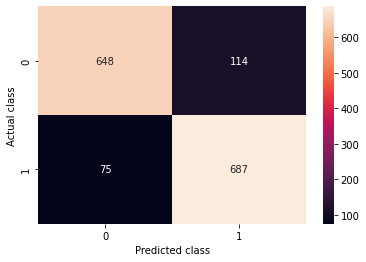

In [51]:
cm = confusion_matrix(test_set["Prediction"], mnb_tv_final.predict(word_weights_test_final))
sns.heatmap(cm, annot= True, fmt="d")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()

In [52]:
true_vs_predicted = list(enumerate(zip(test_set["Prediction"],mnb_tv_final.predict(word_weights_test_final))))
false_positives = [i for i in range(len(true_vs_predicted)) if true_vs_predicted[i][1][0]==0 and true_vs_predicted[i][1][1]==1]
false_negatives = [i for i in range(len(true_vs_predicted)) if true_vs_predicted[i][1][0]==1 and true_vs_predicted[i][1][1]==0]

In [53]:
test_set.iloc[false_negatives]

,Prediction,Message
1,1,I don't know what's in it. As if they know wha...
35,1,"A good friend is recovering after covid, havin..."
55,1,All I can say is wow!!
66,1,And a vaccine literally introduces the virus t...
73,1,Anti-vaxers chose to believe the lie because t...
...,...,...
1470,1,"my parents are scared of the vaccine since "" i..."
1490,1,the government explains the effectiveness of t...
1492,1,the vaccine is developed by a trusted company
1508,1,vaccines can resist the harm caused by the new...


In [54]:
test_set.iloc[false_positives]

,Prediction,Message
8,0,"if you don't have the vaccine, you're robbing ..."
21,0,2 years ago today I took a vaccine that I was ...
46,0,"About 4 months ago, I had COVID-19. I just got..."
52,0,After every COVID-19 vaccine dose my eczema go...
53,0,After my second Pfizer shot I had. 105.2 fever...
...,...,...
1454,0,if you’re smart enough and have a clear mindse...
1474,0,never vaccinate your children
1485,0,that vaccines are preventing millions of death...
1496,0,two does of vaccine and then again covid 19


### Different machine learning algorithms: Perceptron

In [55]:
perceptron = Perceptron()
perceptron.fit(word_counts_final, training_labels_final)

Perceptron()

In [56]:
perceptron.score(word_counts_test_final, test_set["Prediction"])

0.8530183727034121